In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

In [3]:
np.random.seed(37)

In [4]:
base = pd.read_csv(r"C:\Users\tancr\Downloads\ml-100k\ml-100k\ua.base", sep='\t', names = ["user_id", "movie_id", "ratings", "timestamp"])

In [5]:
test = pd.read_csv(r"C:\Users\tancr\Downloads\ml-100k\ml-100k\ua.test", sep='\t', names = ["user_id", "movie_id", "ratings", "timestamp"])

In [6]:
matrix_base = base.pivot(values='ratings', index='user_id', columns='movie_id')
matrix_base

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
matrix_test = test.pivot(values='ratings', index='user_id', columns='movie_id')
matrix_test

movie_id,1,2,3,4,5,6,7,8,9,10,...,1591,1592,1600,1612,1617,1646,1653,1656,1662,1664
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
matrix_test = matrix_test.drop([1582, 1653], axis = 1)

In [9]:
m_base = np.array(matrix_base)
m_test = np.array(matrix_test)

In [10]:
m_base = np.nan_to_num(m_base, nan = -1)
m_test = np.nan_to_num(m_test, nan = -1)


m_base = m_base.astype(int)
m_test = m_test.astype(int)

In [11]:
def log_sum_exp(log_probs):
    max_log_prob = np.max(log_probs)
    return max_log_prob + np.log(np.sum(np.exp(log_probs - max_log_prob)))

In [12]:
EPSILON = 1e-10  # A small value to prevent log(0)

def e_step(data, class_prob, vote_prob):

    n_users, n_items = data.shape

    n_classes = class_prob.shape[0]

    responsibilities = np.zeros((n_users, n_classes))  # γ_uc

    for u in range(n_users):
        log_responsibilities = np.zeros(n_classes)
        for c in range(n_classes):
            log_prob = np.log(class_prob[c] + EPSILON)
            for i in range(n_items):
                if data[u, i] != -1:
                    log_prob += np.log(vote_prob[c, i, data[u, i] - 1] + EPSILON)
            log_responsibilities[c] = log_prob

        log_sum_responsibilities = log_sum_exp(log_responsibilities)
        responsibilities[u, :] = np.exp(log_responsibilities - log_sum_responsibilities)  # Normalize responsibilities

    if np.any(np.isnan(responsibilities[u, :])) or np.any(np.isinf(responsibilities[u, :])):
        print(f"NaN or Inf found in responsibilities for user {u}: {responsibilities[u, :]}")



    return responsibilities

In [13]:
def m_step(data, responsibilities, n_classes, n_items, n_votes):
    n_users, _ = data.shape

    # Update class probabilities
    class_prob = np.sum(responsibilities, axis=0) / n_users

    # Update vote probabilities
    vote_prob = np.zeros((n_classes, n_items, n_votes))

    for c in range(n_classes):
        for i in range(n_items):
            denominator = np.sum([responsibilities[u, c] for u in range(n_users) if data[u, i] != -1])
            if denominator > 0:
                for k in range(n_votes):
                    numerator = np.sum([responsibilities[u, c] for u in range(n_users) if data[u, i] - 1 == k])
                    vote_prob[c, i, k] = numerator / denominator


    if np.any(np.isnan(class_prob)) or np.any(np.isinf(class_prob)):
        print(f"NaN or Inf found in class probabilities: {class_prob}")
    if np.any(np.isnan(vote_prob)) or np.any(np.isinf(vote_prob)):
        print(f"NaN or Inf found in vote probabilities: {vote_prob}")



    return class_prob, vote_prob

In [14]:
def log_likelihood(data, class_prob, vote_prob):

    n_users, n_items = data.shape

    n_classes = class_prob.shape[0]

    log_likelihood = 0

    for u in range(n_users):
        log_user_likelihood = []
        for c in range(n_classes):
            log_class_likelihood = np.log(class_prob[c] + EPSILON)
            for i in range(n_items):
                if data[u, i] != -1:
                    log_class_likelihood += np.log(vote_prob[c, i, data[u, i] - 1] + EPSILON)
            log_user_likelihood.append(log_class_likelihood)
        log_likelihood += log_sum_exp(log_user_likelihood)

    return log_likelihood

In [15]:
def fit(data, class_prob, vote_prob, max_iter=100):
    log_likelihoods = []
    c_p = class_prob.copy()
    v_p = vote_prob.copy()
    for _ in range(max_iter):
        responsibilities = e_step(data, c_p, v_p)  # E-step
        c_p, v_p = m_step(data, responsibilities, n_classes, n_items, n_votes)  # M-step
        log_l = log_likelihood(data, c_p, v_p)
        log_likelihoods.append(log_l)
        print(f'{_=}')
    return c_p, v_p, log_likelihoods

In [16]:
n_users = m_base.shape[0]
n_items = m_base.shape[1]
n_votes = 5


In [2]:
class_prob

NameError: name 'class_prob' is not defined

In [17]:
cl = []

vote = []

like = []

for i in range(2,11):

  n_classes = i
  n_items = m_base.shape[1]
  n_votes = 5
  n_users = m_base.shape[0]

  # Initialize class probabilities using Dirichlet distribution
  class_prob = np.random.dirichlet(np.ones(n_classes))

  # Initialize vote probabilities using Dirichlet distribution for each class-item pair
  vote_prob = np.zeros((n_classes, n_items, n_votes))
  for c in range(n_classes):
      for i in range(n_items):
          vote_prob[c, i, :] = np.random.dirichlet(np.ones(n_votes))

  c, v, l = fit(m_base, class_prob, vote_prob, 30)
  cl.append(c)
  vote.append(v)
  like.append(l)

_=0
_=1
_=2
_=3
_=4
_=5
_=6
_=7
_=8
_=9
_=10
_=11
_=12
_=13
_=14
_=15
_=16
_=17
_=18
_=19
_=20
_=21
_=22
_=23
_=24
_=25
_=26
_=27
_=28
_=29
_=0
_=1
_=2
_=3
_=4
_=5
_=6
_=7
_=8
_=9
_=10
_=11
_=12
_=13
_=14
_=15
_=16
_=17
_=18
_=19
_=20
_=21
_=22
_=23
_=24
_=25
_=26
_=27
_=28
_=29
_=0
_=1
_=2
_=3
_=4
_=5
_=6
_=7
_=8
_=9
_=10
_=11
_=12
_=13
_=14
_=15
_=16
_=17
_=18
_=19
_=20
_=21
_=22
_=23
_=24
_=25
_=26
_=27
_=28
_=29
_=0
_=1
_=2
_=3
_=4
_=5
_=6
_=7
_=8
_=9
_=10
_=11
_=12
_=13
_=14
_=15
_=16
_=17
_=18
_=19
_=20
_=21
_=22
_=23
_=24
_=25
_=26
_=27
_=28
_=29
_=0
_=1
_=2
_=3
_=4
_=5
_=6
_=7
_=8
_=9
_=10
_=11
_=12
_=13
_=14
_=15
_=16
_=17
_=18
_=19
_=20
_=21
_=22
_=23
_=24
_=25
_=26
_=27
_=28
_=29
_=0
_=1
_=2
_=3
_=4
_=5
_=6
_=7
_=8
_=9
_=10
_=11
_=12
_=13
_=14
_=15
_=16
_=17
_=18
_=19
_=20
_=21
_=22
_=23
_=24
_=25
_=26
_=27
_=28
_=29
_=0
_=1
_=2
_=3
_=4
_=5
_=6
_=7
_=8
_=9
_=10
_=11
_=12
_=13
_=14
_=15
_=16
_=17
_=18
_=19
_=20
_=21
_=22
_=23
_=24
_=25
_=26
_=27
_=28
_=29
_=0
_=1
_=2
_=3
_=4


Text(0, 0.5, 'Observed Log Likelihood')

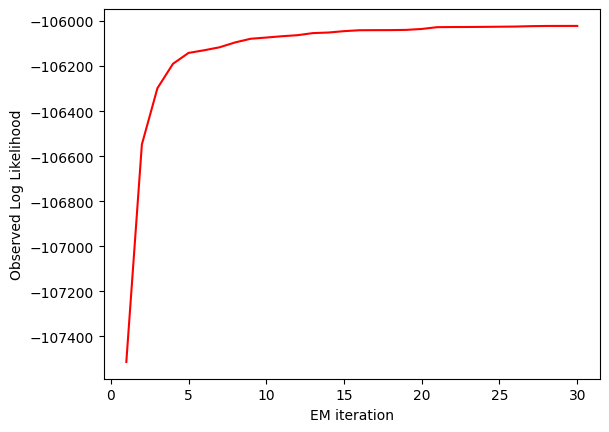

In [33]:
plt.plot(np.arange(1,31), like[4], 'r-')
plt.xlabel("EM iteration")
plt.ylabel("Observed Log Likelihood")

In [23]:
like_ar = np.array(like)

In [26]:
like_ar[:, -1]

array([-115300.14357833, -112986.84313013, -110403.1924112 ,
       -108548.75821801, -106021.65077958, -104485.02779752,
       -102177.7554044 , -100256.57159255,  -98248.53740933])

In [1]:
like[4]

NameError: name 'like' is not defined

Text(0, 0.5, 'Final Observed Log Likelihood')

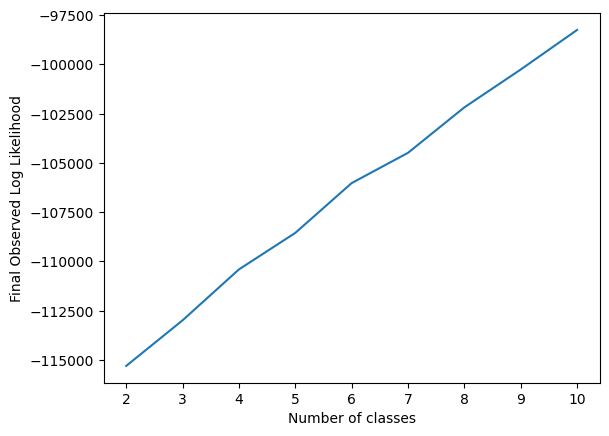

In [35]:
plt.plot(np.arange(2,11), like_ar[:, -1])
plt.xlabel("Number of classes")
plt.ylabel("Final Observed Log Likelihood")

### Define dictionaries for conversion between indexes

In [41]:
dic = {}
c = 0
for i in matrix_test.columns:
  dic[c] = i
  c += 1

dic_items_test = dic

In [42]:
dic = {}
c = 0
for i in matrix_test.columns:
  dic[i] = c
  c += 1

dic_items_base = dic

In [79]:
def predict(user_votes, posteriors, class_prob, vote_prob, n_classes, n_votes):

    n_items = len(user_votes)

    # Compute the expected vote for each item
    expected_votes = np.full(n_items, -1, dtype = float)
    for i in range(n_items):
        expected_vote = -1
        if user_votes[i] != -1:
          expected_vote = 0
          index_item = dic_items_test[i]
          index_par = dic_items_base[index_item]
          for z in range(n_classes):
              for k in range(n_votes):
                  expected_vote += posteriors[z] * (k+1) * vote_prob[z, index_par, k]
        expected_votes[i] = expected_vote

    return expected_votes

In [75]:
r = e_step(m_base, cl[4], vote[4])

In [76]:
p = predict(m_test[13], r[13], cl[4], vote[4], 6, 5)

5.75407415822242e-26
6.323503950570123e-25
1.3187067451363425e-24
1.778554467916173e-24
1.778554467916173e-24
1.778554467916173e-24
1.778554467916173e-24
1.778554467916173e-24
1.778554467916173e-24
1.778554467916173e-24
1.7785544679204528e-24
1.7785544679287536e-24
1.7785544680034732e-24
1.778554468011773e-24
1.778554468022162e-24
1.778554468022162e-24
1.778554468022162e-24
1.778554468022162e-24
1.778554468022162e-24
1.778554468022162e-24
1.778554468022162e-24
1.778554468022162e-24
1.778554468022162e-24
1.778554468022162e-24
1.778554468022162e-24
0.12474318668376289
0.8732023067567749
2.002054506559432
2.5010272532747475
2.501027253274831
2.445108036573458e-78
2.445108036573458e-78
3.4110561955378835e-25
1.4395648707342921e-24
2.941446186040778e-24
2.941446186040778e-24
2.941446186040778e-24
2.941446186040778e-24
2.941446186040778e-24
2.941446186040778e-24
2.941446186041367e-24
2.9414461860437236e-24
2.941446186062552e-24
2.94144618613544e-24
2.9414461861915604e-24
2.9414461861915604e-

In [80]:
res = []

for i in range(m_test.shape[0]):

  user_votes = m_test[i,:]

  responsibilities = r[i, :]

  risultato = predict(user_votes, responsibilities, cl[4], vote[4], 6, 5)

  print(f'{i=}', len(risultato[risultato != -1]) == len(user_votes[user_votes != -1]))

  res.append(risultato)

i=0 True
i=1 True
i=2 True
i=3 True
i=4 True
i=5 True
i=6 True
i=7 True
i=8 True
i=9 True
i=10 True
i=11 True
i=12 True
i=13 True
i=14 True
i=15 True
i=16 True
i=17 True
i=18 True
i=19 True
i=20 True
i=21 True
i=22 True
i=23 True
i=24 True
i=25 True
i=26 True
i=27 True
i=28 True
i=29 True
i=30 True
i=31 True
i=32 True
i=33 True
i=34 True
i=35 True
i=36 True
i=37 True
i=38 True
i=39 True
i=40 True
i=41 True
i=42 True
i=43 True
i=44 True
i=45 True
i=46 True
i=47 True
i=48 True
i=49 True
i=50 True
i=51 True
i=52 True
i=53 True
i=54 True
i=55 True
i=56 True
i=57 True
i=58 True
i=59 True
i=60 True
i=61 True
i=62 True
i=63 True
i=64 True
i=65 True
i=66 True
i=67 True
i=68 True
i=69 True
i=70 True
i=71 True
i=72 True
i=73 True
i=74 True
i=75 True
i=76 True
i=77 True
i=78 True
i=79 True
i=80 True
i=81 True
i=82 True
i=83 True
i=84 True
i=85 True
i=86 True
i=87 True
i=88 True
i=89 True
i=90 True
i=91 True
i=92 True
i=93 True
i=94 True
i=95 True
i=96 True
i=97 True
i=98 True
i=99 True
i=100 True

In [81]:
res

[array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([ 3.96935812,  3.3       , -1.        , ..., -1.        ,
        -1.        , -1.        ]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([ 3.89210783, -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., 

In [82]:
res = np.concatenate(res, axis = 0)

In [83]:
a = res[res != -1]

In [84]:
b = m_test[m_test != -1]

In [86]:
len(b)

9428

In [87]:
mae = np.mean(np.abs(a-b))

In [88]:
mae

1.0538295282704315

In [100]:
for i in range(9):
    np.save(f'like{i}.npy', like[i])


In [101]:
mae

1.0538295282704315

In [102]:
resp = e_step(m_base, cl[4], vote[4])

In [106]:
resp.shape

(943, 6)

In [105]:
max_class_y = np.zeros((943, 2), dtype = int)

In [107]:
for i in range(943):
    max_class_y[i,0] = i
    max_class_y[i,1] = np.argmax(resp[i,:])

In [109]:
resp

array([[1.91734840e-254, 8.26961521e-251, 1.30586077e-209,
        1.00000000e+000, 0.00000000e+000, 3.38243455e-191],
       [1.00000000e+000, 6.55715228e-021, 1.55383468e-038,
        5.93219797e-048, 4.44884078e-059, 5.92769417e-028],
       [3.43844624e-105, 1.48877722e-053, 1.05976411e-024,
        1.78965687e-061, 1.00000000e+000, 5.41443835e-097],
       ...,
       [8.29678500e-002, 5.01630571e-002, 3.80283304e-001,
        6.57600349e-002, 5.03480118e-002, 3.70477743e-001],
       [2.22539276e-052, 2.81440521e-015, 3.95547678e-050,
        1.00000000e+000, 9.33645656e-066, 6.55399247e-021],
       [4.03928592e-146, 1.00000000e+000, 1.52240676e-074,
        8.49792911e-322, 3.34353157e-250, 1.52431803e-114]])

In [108]:
max_class_y

array([[  0,   3],
       [  1,   0],
       [  2,   4],
       ...,
       [940,   2],
       [941,   3],
       [942,   1]])

In [110]:
np.save('max_class_user_MMM.npy', max_class_y)